## We be visualizing
* The column Weighted_Price should be removed
* The column timestamp renamed to Date
* The timestamp values should be datetime
* Index on Date
* Missing values in close should be set to previous row values
* Missing values in Volume_(BTC) and Volume_(Currency) should be set to 0
* Plot the data from 2017 and beyond at daily intervals and group the values of the same day such that:

High: max
Low: min
Open: mean
Close: mean
Volume(BTC): sum
Volume(Currency): sum

In [30]:
import pandas as pd

coin = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

coin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
coin.drop(["Weighted_Price"], inplace=True, axis=1)
coin.rename(columns={"Timestamp": "Date"})
coin["Date"] = pd.to_datetime(coin["Timestamp"], unit='s')
coin.set_index("Date", inplace=True)

coin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Date,,,,,,,
2014-12-01 05:33:00,1417411980,300.0,300.0,300.0,300.0,0.01,3.0
2014-12-01 05:34:00,1417412040,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:35:00,1417412100,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:36:00,1417412160,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:37:00,1417412220,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
coin["Close"] = coin["Close"].fillna(coin["Close"].ffill())

coin["High"] = coin["High"].fillna(coin["Close"])
coin["Low"] = coin["Low"].fillna(coin["Close"])
coin["Open"] = coin["Open"].fillna(coin["Close"])

coin["Volume_(BTC)"] = coin["Volume_(BTC)"].fillna(0)
coin["Volume_(Currency)"] = coin["Volume_(Currency)"].fillna(0)
coin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Date,,,,,,,
2014-12-01 05:33:00,1417411980,300.0,300.0,300.0,300.0,0.01,3.0
2014-12-01 05:34:00,1417412040,300.0,300.0,300.0,300.0,0.00,0.0
2014-12-01 05:35:00,1417412100,300.0,300.0,300.0,300.0,0.00,0.0
2014-12-01 05:36:00,1417412160,300.0,300.0,300.0,300.0,0.00,0.0
2014-12-01 05:37:00,1417412220,300.0,300.0,300.0,300.0,0.00,0.0


<Axes: xlabel='Date'>

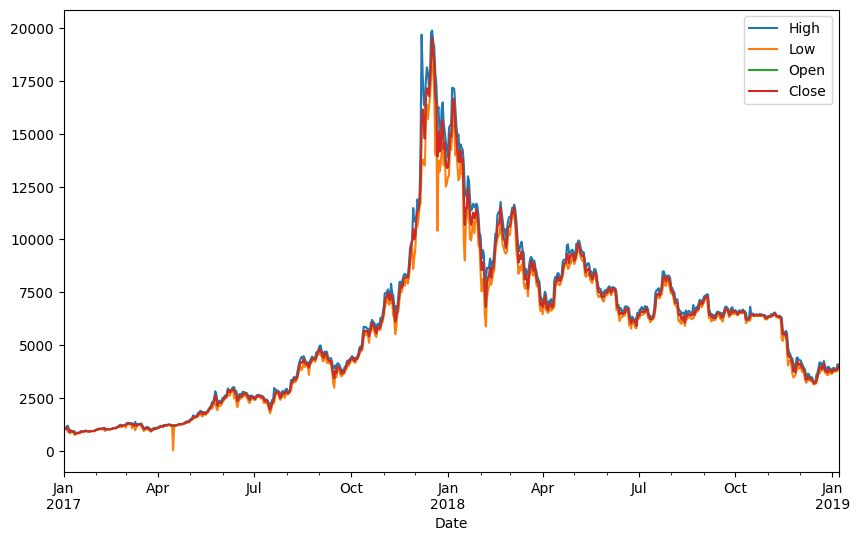

In [33]:
coin_2017 = coin["2017":]

daily_sum = coin_2017.resample('D').agg({
    'High': 'max',
    'Low': 'min',
    'Open': 'mean',
    'Close': 'mean',
    'Volume_(BTC)': 'sum',
    'Volume_(Currency)': 'sum'
})

daily_sum[['High', 'Low', 'Open', 'Close']].plot(figsize=(10, 6))